**Лабораторная работа по модулю “Препроцессинг данных”**

1. Загрузить исходные данные data.csv 
2. Провести первоначальный анализ предложенных данных 
3. Предложить стратегию по работе с пропущенными значениями в данных 
4. Предложить стратегию по работе с категориальными переменными 
5. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей) 
6. Разбить данные на train/test
7. Решить задачу бинарной классификации и предсказать переменную ‘SalesCategory’ протестировав нескольких алгоритмов (Logistic Regression, Random Forest) 
8. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall 
9. Попробовать отобрать наиболее важные переменные (наибольшая корреляция или метод на ваш выбор)
10. Сравнить результаты классификации при использовании изначального датасета и датасета с уменьшенной размерностью
11. Загрузить ipython notebook с результатами работы на github репозиторий


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import os

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# 1. Загрузить исходные данные data.csv

In [2]:
Houses = "data.csv"

data = pd.read_csv(Houses, sep = ';')
data.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


# 2. Провести первоначальный анализ предложенных данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# Размер дата-фрейма 
data.shape

(1460, 81)

In [5]:
# Колонки с пустыми значениями
data.columns[data.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [6]:
data[data.columns[data.isna().any()]].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [7]:
data['SaleCategory'].value_counts()

0    1025
1     435
Name: SaleCategory, dtype: int64

In [8]:
# Основные статистики для переменных
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCategory
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,0.297945
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.457512
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,1.000000


In [9]:
# Мода
data.select_dtypes(include=[np.number]).iloc[:,1:].mode()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCategory
0,20,60.0,7200,5,5,2006,1950,0.0,0,0,...,0,0,0,0,0,0,0,6,2009,0


# 3. Предложить стратегию по работе с пропущенными значениями в данных

*** Текстовые переменные предполагается оставить без изменений, так как при последующей обработке датасета планируется использовать метод get_dummies. Числовые переменные заполним средним арифметическим по столбцу.***

In [10]:
# Находим колонки содержащие пустые значения и берем только те, в которых содержаться данные с типом number
# Рассчитывам среднее значение по этим колонкам
means = data[data.columns[data.isna().any()]].select_dtypes(include=np.number).mean()

In [11]:
# Результаты расчетов среднего значения
means

LotFrontage      70.049958
MasVnrArea      103.685262
GarageYrBlt    1978.506164
dtype: float64

In [12]:
# Заполняем пустые значения средними значениями
data.fillna(means, inplace=True)

# 4. Предложить стратегию по работе с категориальными переменными 

**Преобразуем категориальные переменные с помощью метода get_dummies.**

*data = pd.get_dummies(data)
data.drop(columns=['Id'], inplace=True)*

(Указанный код используется ниже (в Разделе 7 **"Решить задачу бинарной классификации и предсказать переменную ‘SalesCategory’ протестировав нескольких алгоритмов (Logistic Regression, Random Forest)"**), чтобы не вносить искажений в построение корреляционной матрицы и визуализацию взаимосвязей переменных датасета)

# 5. Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей) 

In [13]:
# Построение корреляционной матрицы
corr = data.corr()

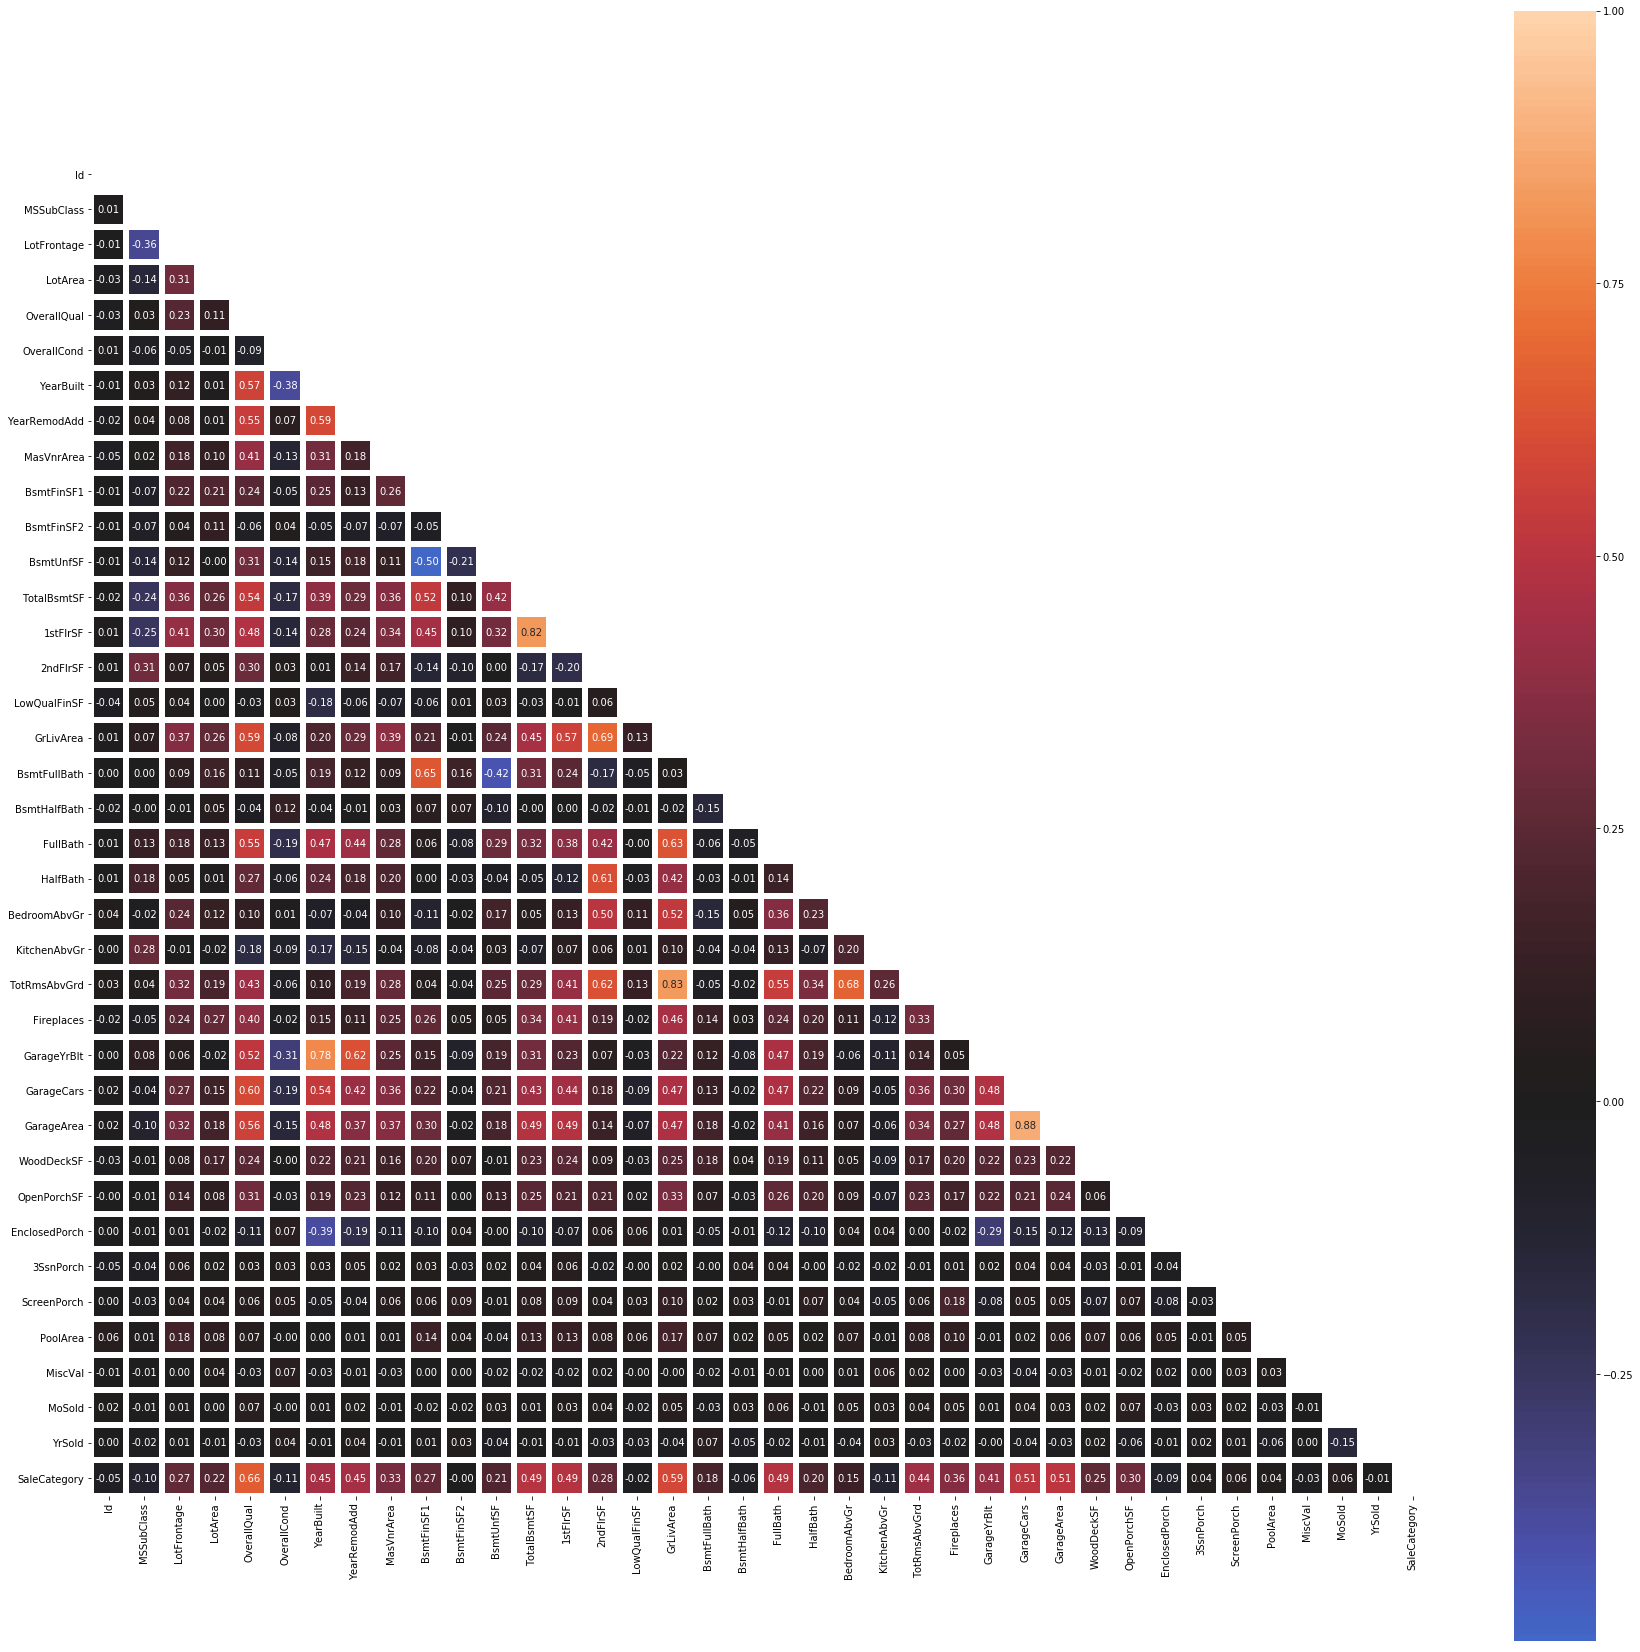

In [14]:
# Визуализация корреляционной матрицы
%config InlineBackend.figure_format = 'png'
plt.figure(figsize=(30,30))
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
# Перевод: Создайте маску, чтобы скрыть верхний треугольник матрицы корреляции (которая является симметричной)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f', square=True, linewidths=5);

**Визуализация взаимосвязей между переменными**

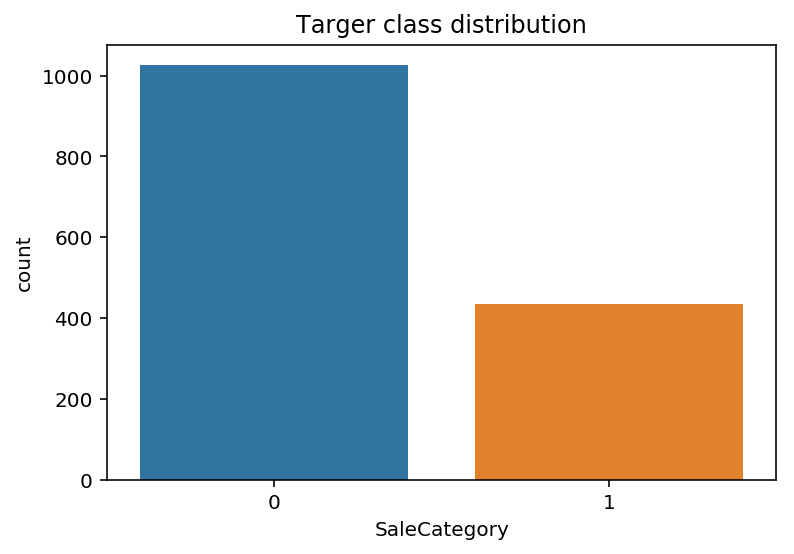

In [15]:
# Распределение параметра SaleCategory
%config InlineBackend.figure_format = 'retina'
ax = plt.axes()
sns.countplot(x='SaleCategory', data=data, ax=ax);
ax.set_title('Targer class distribution')
plt.show()

**Распределение признаков в зависимости от значения target 0 или 1** (targer является переменная SaleCategory)

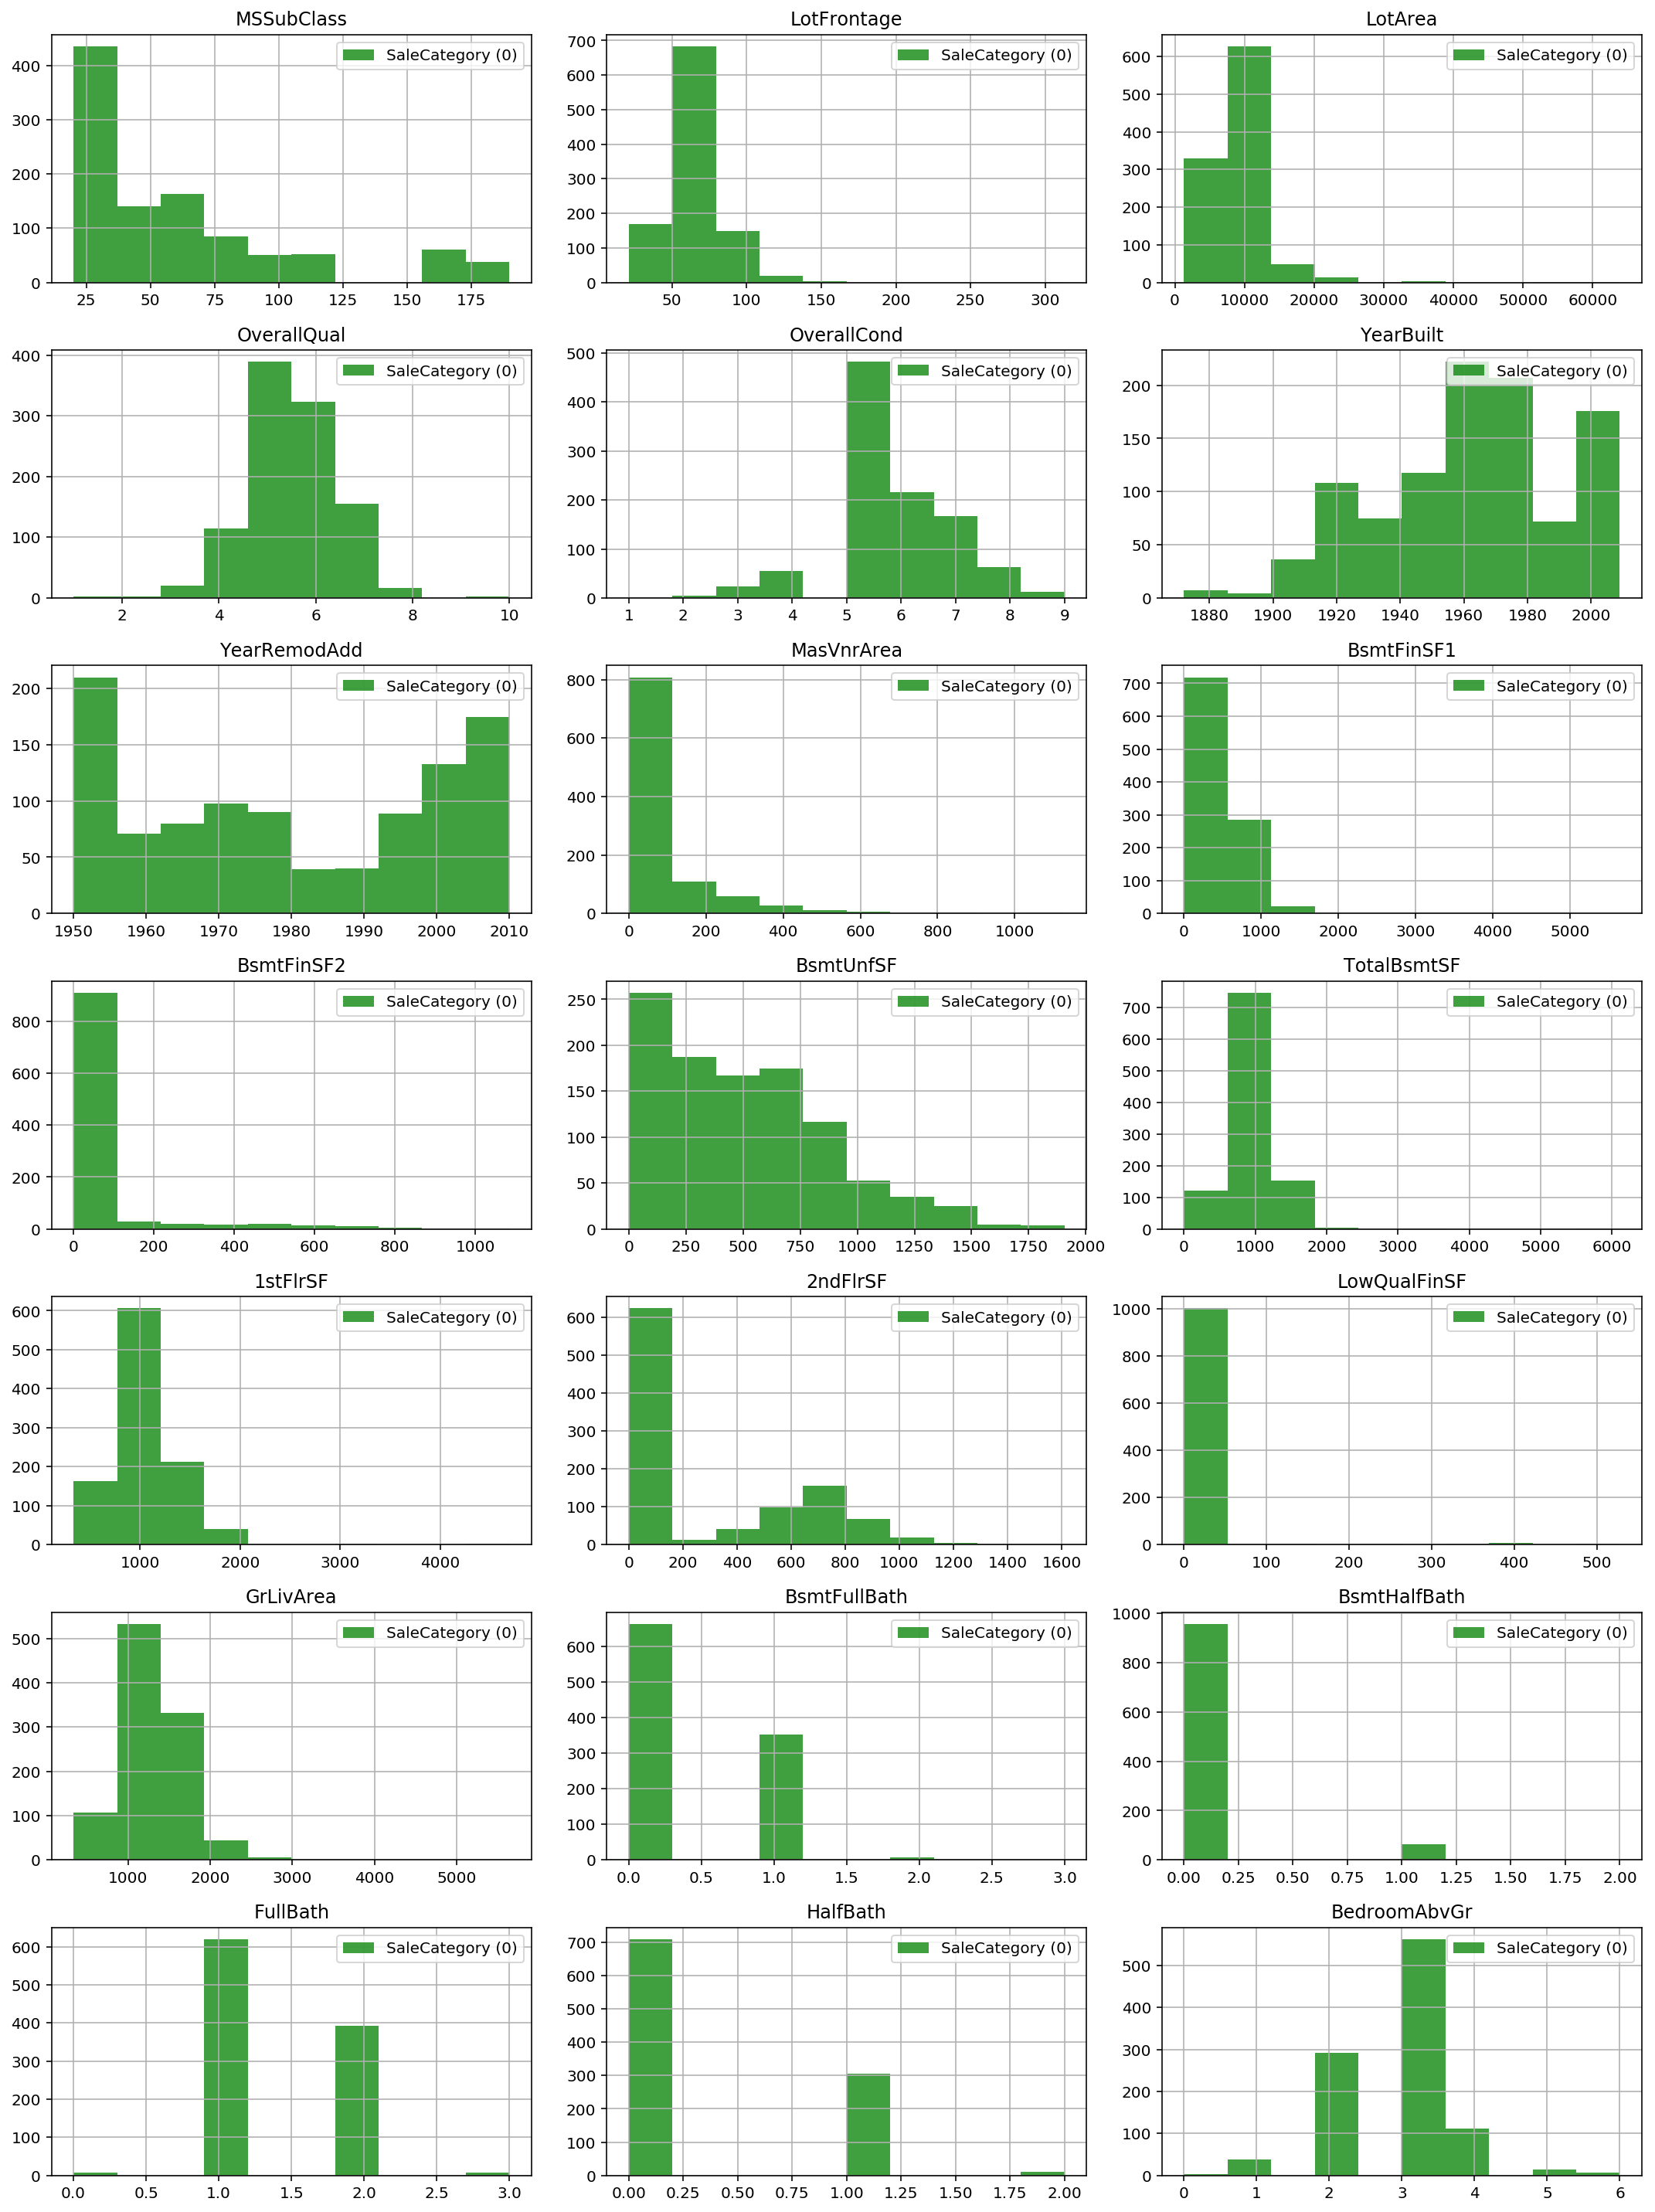

In [16]:
# SaleCategory - 0
fig, ax = plt.subplots(7,3, figsize=(15,20))
for col, axis in zip(data.select_dtypes(include=[np.number]).columns[1:], [i for i in ax.flat]):
    data.loc[data['SaleCategory']==0,data.columns!='SaleCategory'].hist(column=col, ax=axis, alpha=0.75, color='green', label='SaleCategory (0)')
    axis.legend(loc="upper right")
plt.tight_layout()
plt.show()

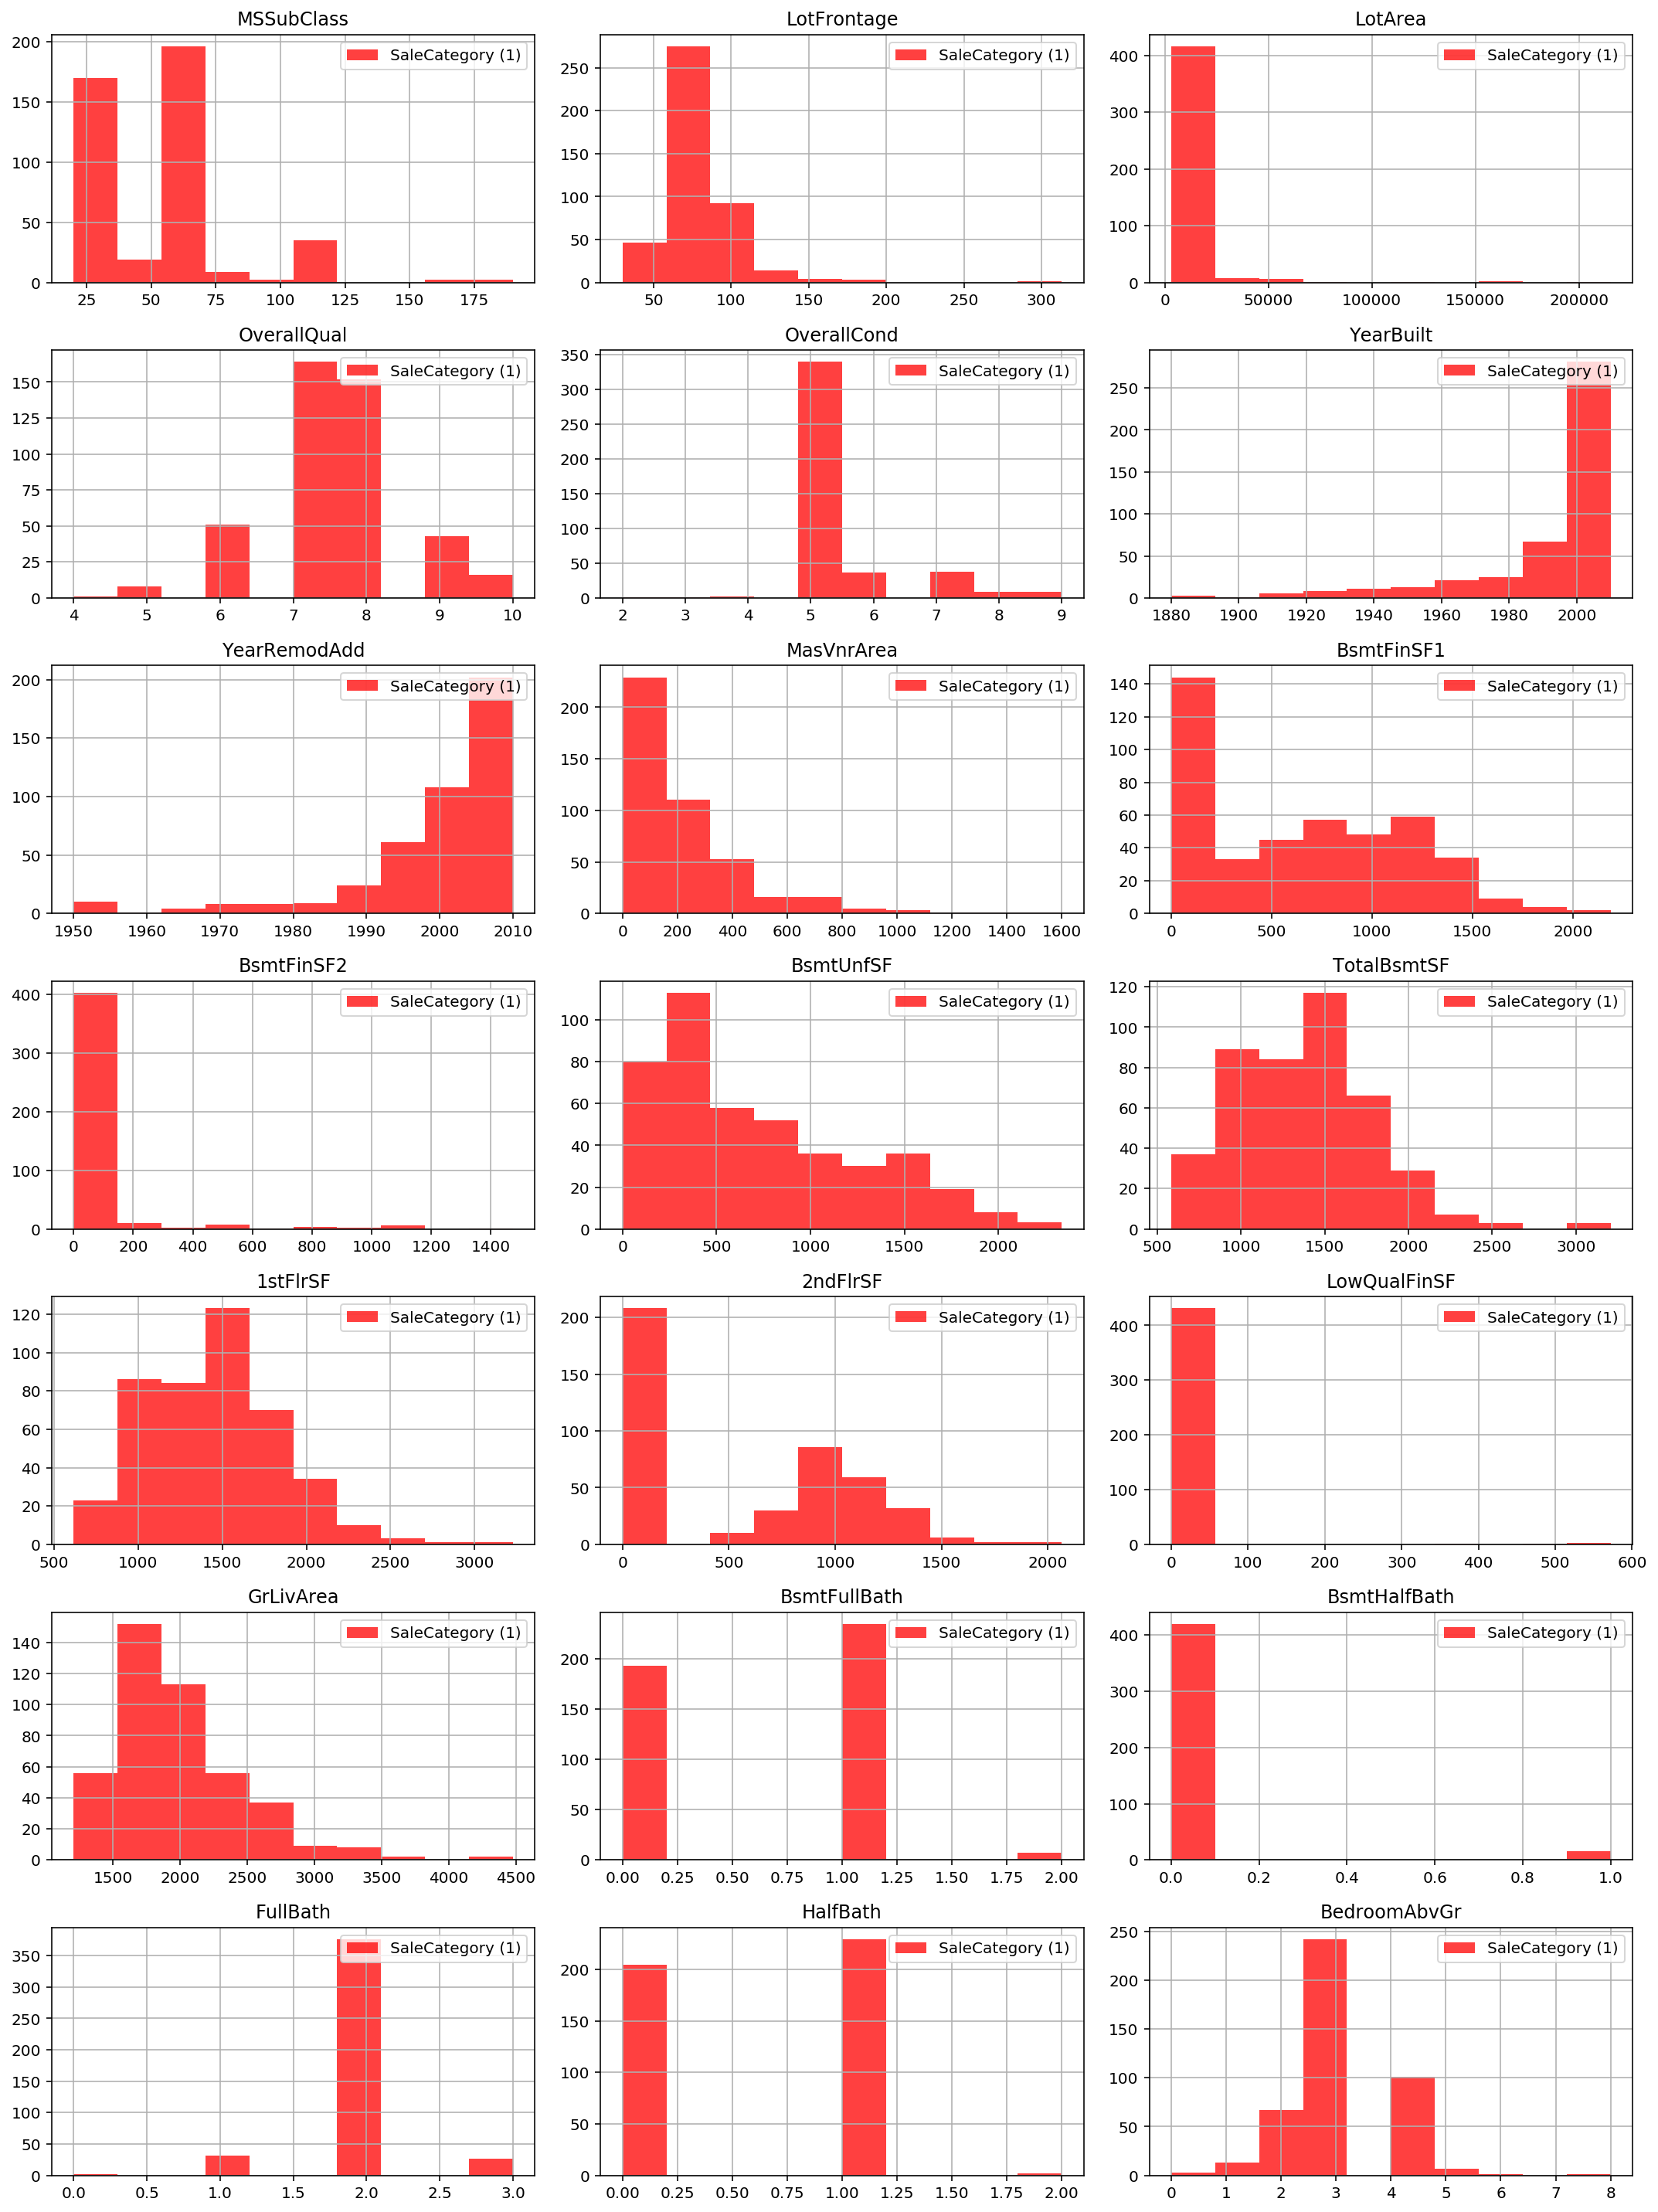

In [17]:
# SaleCategory - 1
fig, ax = plt.subplots(7,3, figsize=(15,20))
for col, axis in zip(data.select_dtypes(include=[np.number]).columns[1:],[i for i in ax.flat]):
    data.loc[data['SaleCategory']==1, data.columns!='SaleCategory'].hist(column=col, ax=axis, alpha=0.75, color='red', label='SaleCategory (1)')
    axis.legend(loc="upper right")
plt.tight_layout()
plt.show()

**Признаки распределенные:** либо нормально, либо экспоненциально, либо бернулли

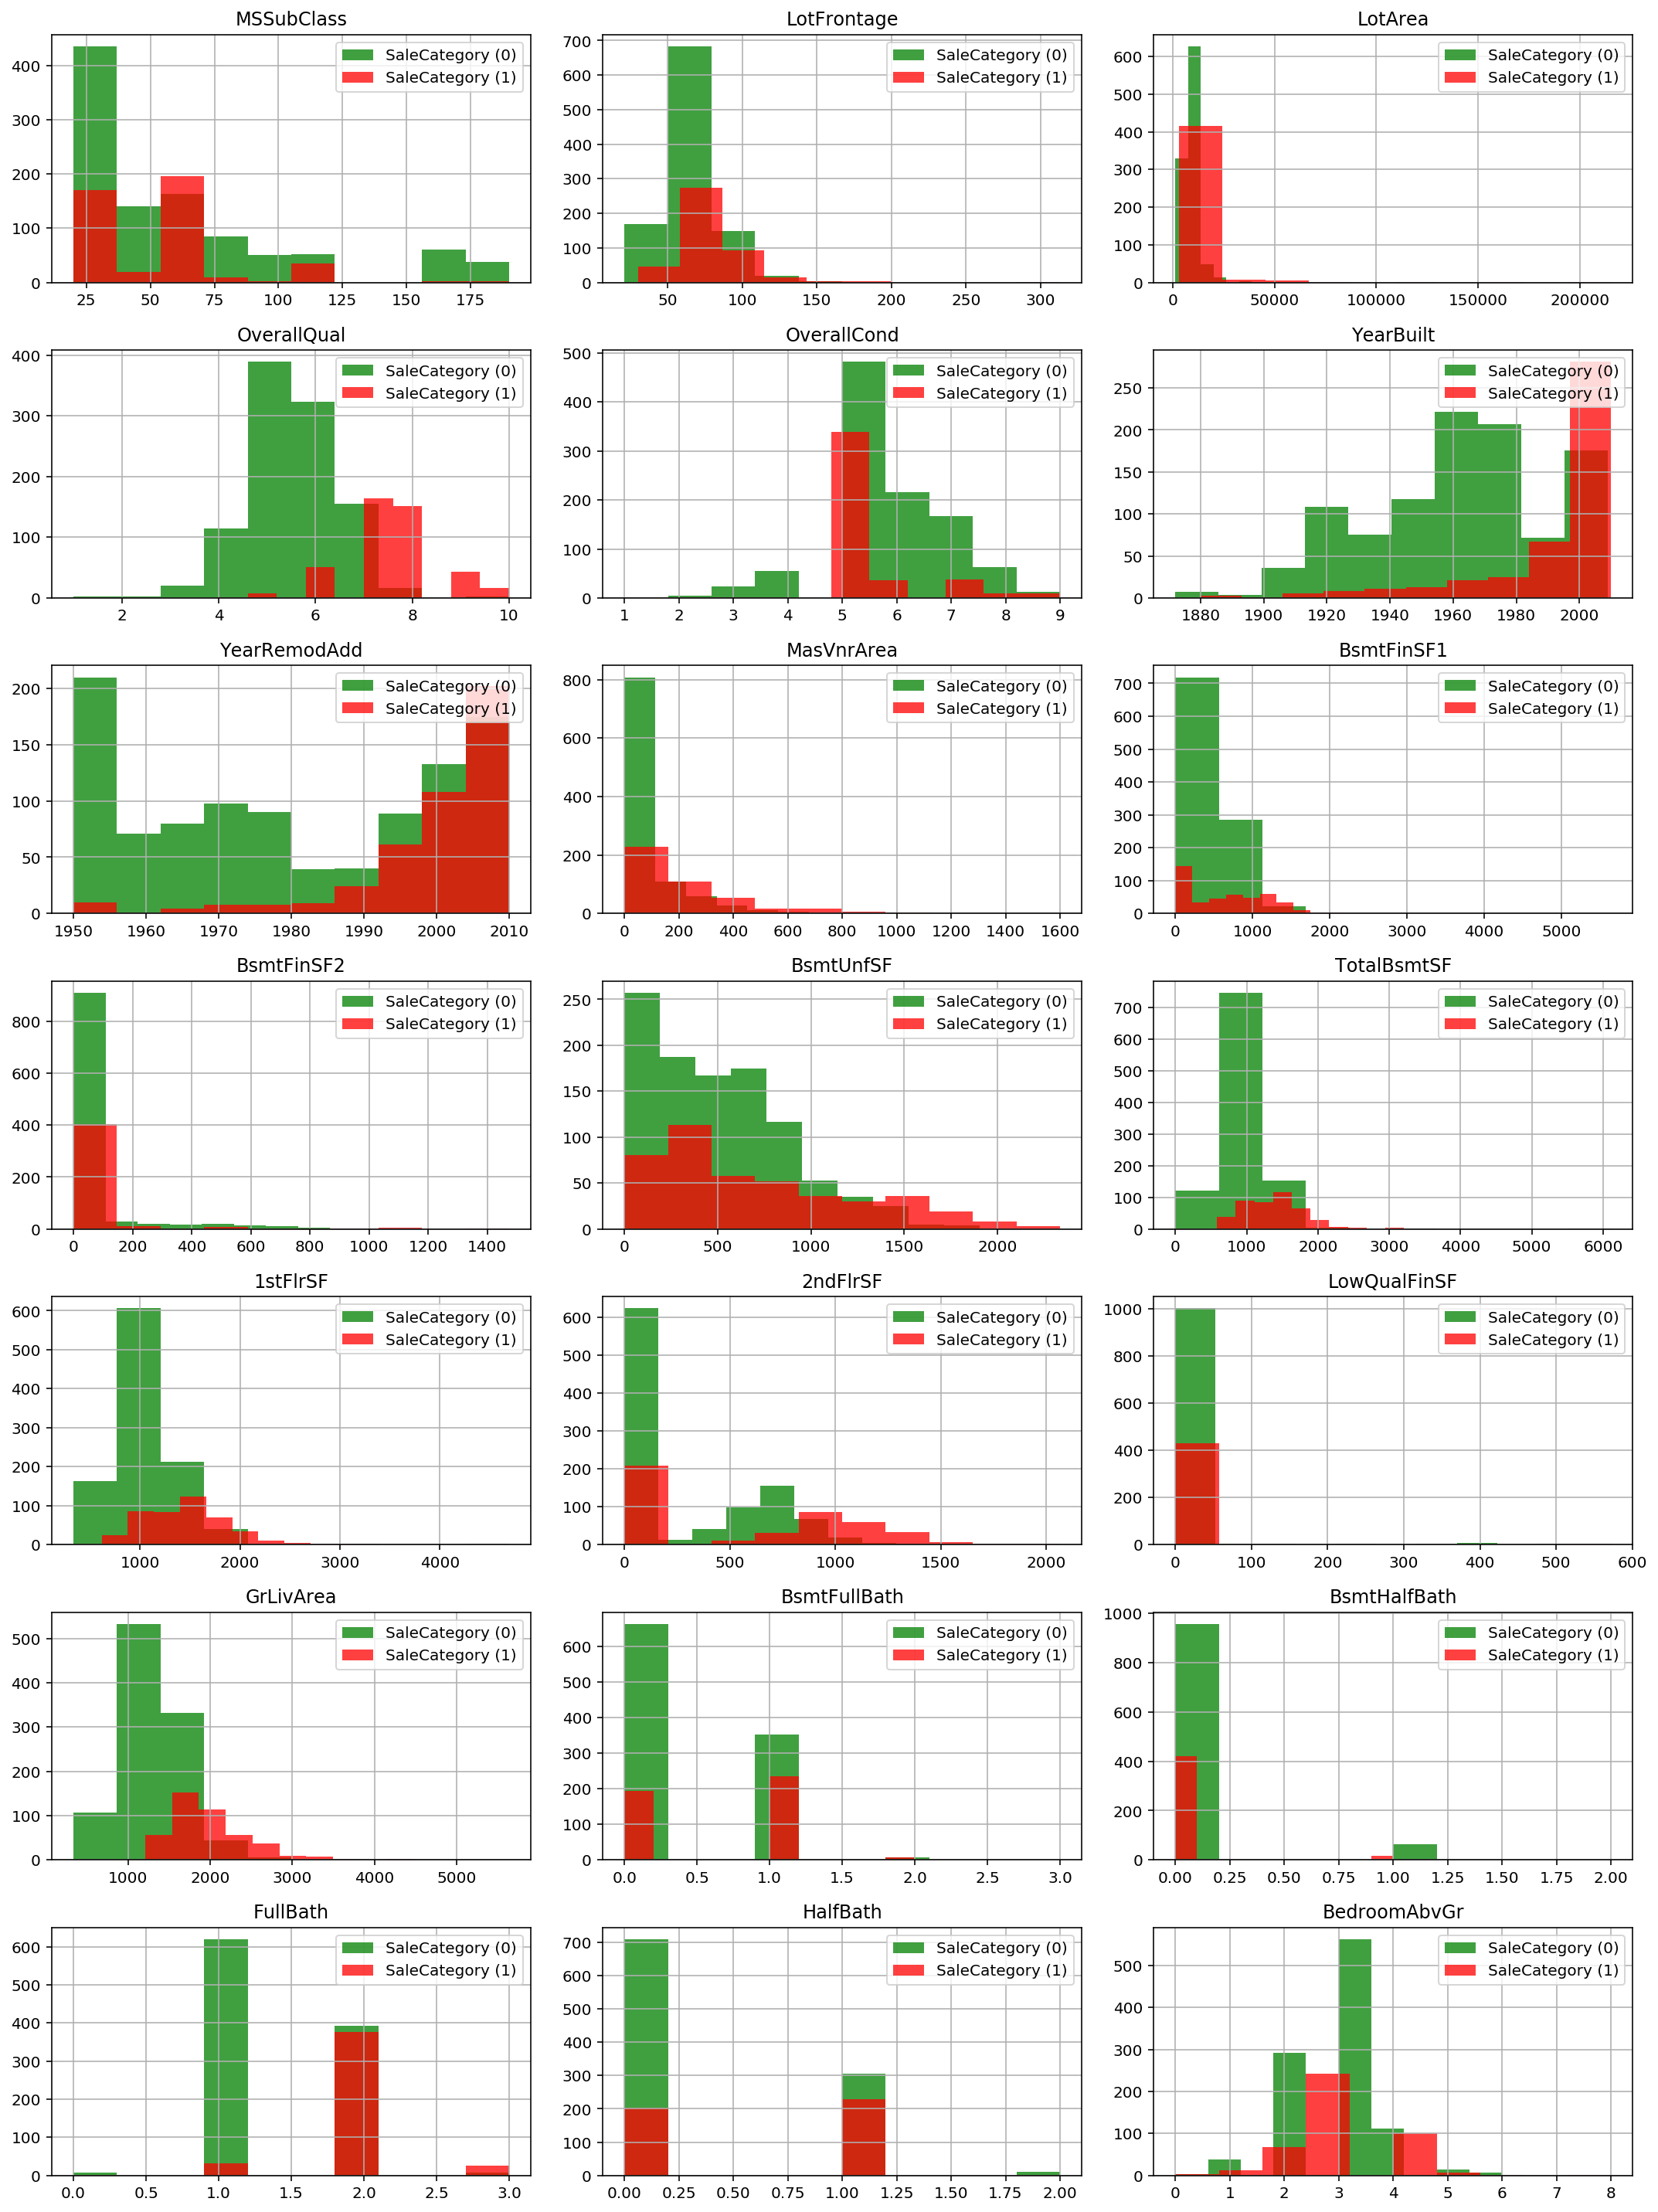

In [18]:
# SaleCategory совместно 1 и 0.
fig, ax = plt.subplots(7,3, figsize=(15,20))
for col, axis in zip(data.select_dtypes(include=[np.number]).columns[1:],[i for i in ax.flat]):
    data.loc[data['SaleCategory']==0, data.columns!='SaleCategory'].hist(column=col, ax=axis, alpha=0.75, color='green', label='SaleCategory (0)')
    data.loc[data['SaleCategory']==1, data.columns!='SaleCategory'].hist(column=col, ax=axis, alpha=0.75, color='red', label='SaleCategory (1)')
    axis.legend(loc="upper right")
plt.tight_layout()
plt.show()

# 6. Разбить данные на train/test

In [19]:
# Определение target, feature. Распределение данных на тренировочную и тестовую выборки. 
y=data['SaleCategory'].copy()
X=data.drop('SaleCategory', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Решить задачу бинарной классификации и предсказать переменную ‘SalesCategory’ протестировав нескольких алгоритмов (Logistic Regression, Random Forest)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, f1_score, precision_score, recall_score

In [21]:
# Преобразуем категориальные переменные с помощью метода get_dummies. Удаляем столбец Id (описание кода давалось в Разделе 4)
data = pd.get_dummies(data)
data.drop(columns=['Id'], inplace=True)

In [22]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
# Определение target, feature. Распределение данных на тренировочную и тестовую выборки.
y=data['SaleCategory'].copy()
X=data.drop('SaleCategory', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Стандартизация значений переменных
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\bas

**Модель LogisticRegression (логистическая регресия)**

In [25]:
logreg = LogisticRegression() # выбираем модель обучения (логистическая регрессия)
logreg.fit(X_train, y_train) # обучаем модель

y_pred_logreg_test = logreg.predict_proba(X_test)[:,1] # предсказание для train
y_pred_logreg_train = logreg.predict_proba(X_train)[:,1] # предсказание для test

roc_auc_test = np.round(roc_auc_score(y_test, y_pred_logreg_test), 2)
roc_auc_train = np.round(roc_auc_score(y_train, y_pred_logreg_train), 2)

print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train:  0.99
Test:  0.98


**Модель RandomForestClassifier (случайный лес)**

In [26]:
# RandomForest
clf = RandomForestClassifier() # выбираем тип модели (случайный лес)
clf.fit(X_train, y_train) # обучаем модель

y_pred_clf_test = clf.predict_proba(X_test)[:,1]
y_pred_clf_train = clf.predict_proba(X_train)[:,1]

roc_auc_test_clf = np.round(roc_auc_score(y_test, y_pred_logreg_test), 2)
roc_auc_train_clf = np.round(roc_auc_score(y_train, y_pred_logreg_train), 2)

print("Train: ", roc_auc_train_clf)
print("Test: ", roc_auc_test_clf)

Train:  0.99
Test:  0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 8. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall 

In [27]:
accuracy_log = accuracy_score(y_test, y_pred_logreg_test.round())
f1_score_log = f1_score(y_test, y_pred_logreg_test.round())
precision_score_log = precision_score(y_test, y_pred_logreg_test.round())
recall_score_log = recall_score(y_test, y_pred_logreg_test.round())

print(f'Accuracy: {accuracy_log:.2f}')
print(f'F1_score: {f1_score_log:.2f}')
print(f'Precision_score: {precision_score_log:.2f}')
print(f'Recall_score: {recall_score_log:.2f}')

Accuracy: 0.94
F1_score: 0.89
Precision_score: 0.90
Recall_score: 0.89


In [28]:
# RandomForest
accuracy_clf = accuracy_score(y_test, y_pred_clf_test.round())
f1_score_clf = f1_score(y_test, y_pred_clf_test.round())
precision_score_clf = precision_score(y_test, y_pred_clf_test.round())
recall_score_clf = recall_score(y_test, y_pred_clf_test.round())

print(f'Accuracy: {accuracy_clf:.2f}')
print(f'F1_score: {f1_score_clf:.2f}')
print(f'Precision_score: {precision_score_clf:.2f}')
print(f'Recall_score: {recall_score_clf:.2f}')

Accuracy: 0.93
F1_score: 0.87
Precision_score: 0.94
Recall_score: 0.80


# 9. Попробовать отобрать наиболее важные переменные (наибольшая корреляция или метод на ваш выбор)

**Методика отбора наиболее важных переменных:**
1. Были отобраны все переменные, имеющие значение показателя корреляции больше 0,5 (по модулю), с переменной "SaleCategory"
2. Были отобраны все переменные, имеющие значение показателя корреляции больше 0,5 (по модулю), с переменными из п.1

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, f1_score, precision_score, recall_score

In [30]:
Houses = "data.csv"
datahouse = pd.read_csv(Houses, sep = ';')
df = pd.DataFrame(datahouse, columns=['SaleCategory','OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','GrLivArea', 'BsmtFullBath','FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea'])
df.head()

,SaleCategory,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea
0,1,7,2003,2003,856,1710,1,2,3,8,2003.0,2,548
1,0,6,1976,1976,1262,1262,0,2,3,6,1976.0,2,460
2,1,7,2001,2002,920,1786,1,2,3,6,2001.0,2,608
3,0,7,1915,1970,756,1717,1,1,3,7,1998.0,3,642
4,1,8,2000,2000,1145,2198,1,2,4,9,2000.0,3,836


In [31]:
means = df[df.columns[df.isna().any()]].select_dtypes(include=np.number).mean()
df.fillna(means, inplace=True)

In [32]:
dfcorr = df.corr()

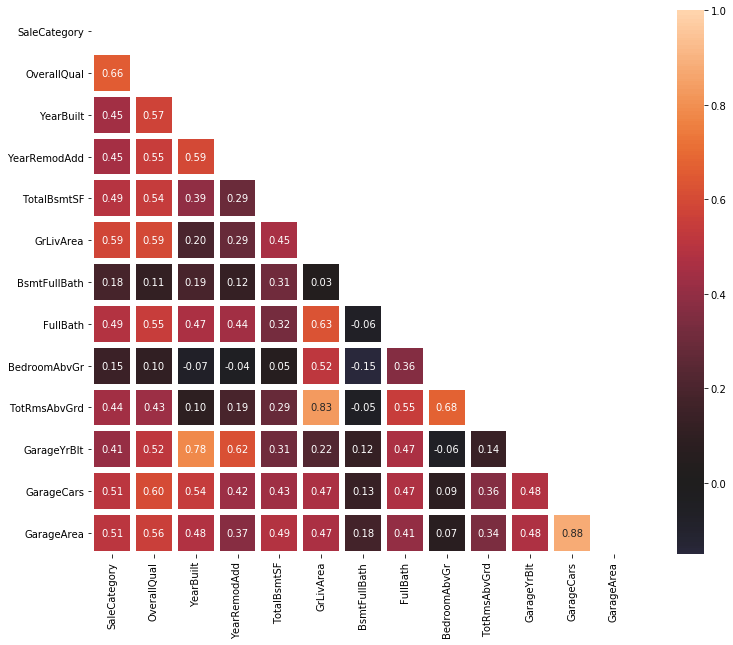

In [33]:
%config InlineBackend.figure_format = 'png'
plt.figure(figsize=(15,10))
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
# Перевод: Создайте маску, чтобы скрыть верхний треугольник матрицы корреляции (которая является симметричной)
mask = np.zeros_like(dfcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(dfcorr, mask=mask, vmax=1, center=0, annot=True, fmt='.2f', square=True, linewidths=5);

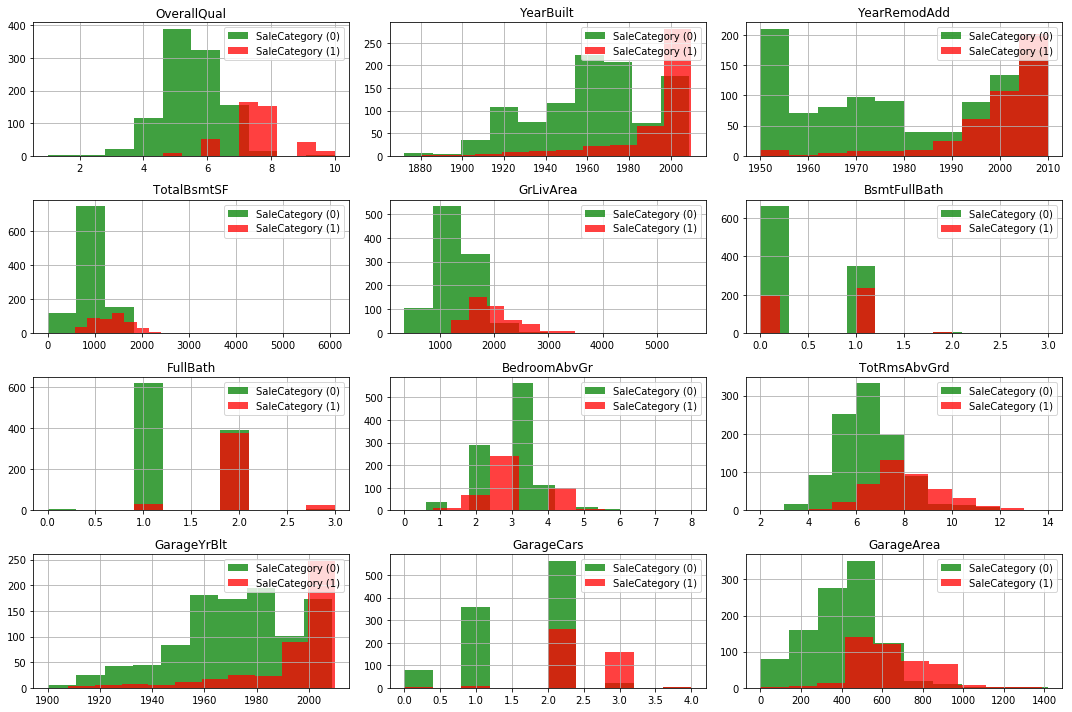

In [34]:
# Признаки распределенные либо нормально, либо экспоненциально, либо бернулли
# Совместно
fig, ax = plt.subplots(4,3, figsize=(15,10))
for col, axis in zip(df.select_dtypes(include=[np.number]).columns[1:],[i for i in ax.flat]):
    df.loc[df['SaleCategory']==0, df.columns!='SaleCategory'].hist(column=col, ax=axis, alpha=0.75, color='green', label='SaleCategory (0)')
    df.loc[df['SaleCategory']==1, df.columns!='SaleCategory'].hist(column=col, ax=axis, alpha=0.75, color='red', label='SaleCategory (1)')
    axis.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [35]:
df = pd.get_dummies(df)

In [36]:
y1=df['SaleCategory'].copy()
X1=df.drop('SaleCategory', axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler()
scaler.fit_transform(X1_train)
X1_train_scaled = scaler.transform(X1_train)
X1_test_scaled = scaler.fit_transform(X1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarn

In [38]:
df_logreg = LogisticRegression() # выбираем модель обучения (логистическая регрессия)
df_logreg.fit(X1_train, y1_train) # обучаем модель

y1_pred_logreg_test = df_logreg.predict_proba(X1_test)[:,1] # предсказание для train
y1_pred_logreg_train = df_logreg.predict_proba(X1_train)[:,1] # предсказание для test

df_roc_auc_test_1 = np.round(roc_auc_score(y1_test, y1_pred_logreg_test), 2)
df_roc_auc_train_1 = np.round(roc_auc_score(y1_train, y1_pred_logreg_train), 2)

print("Train: ", df_roc_auc_train_1)
print("Test: ", df_roc_auc_test_1)

Train:  0.97
Test:  0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
df_accuracy_log = accuracy_score(y1_test, y1_pred_logreg_test.round())
df_f1_score_log = f1_score(y1_test, y1_pred_logreg_test.round())
df_precision_score_log = precision_score(y1_test, y1_pred_logreg_test.round())
df_recall_score_log = recall_score(y1_test, y1_pred_logreg_test.round())

print(f'Accuracy: {df_accuracy_log:.2f}')
print(f'F1_score: {df_f1_score_log:.2f}')
print(f'Precision_score: {df_precision_score_log:.2f}')
print(f'Recall_score: {df_recall_score_log:.2f}')

Accuracy: 0.94
F1_score: 0.89
Precision_score: 0.94
Recall_score: 0.84


In [40]:
# RandomForest
df_clf = RandomForestClassifier() # выбираем тип модели (случайный лес)
df_clf.fit(X1_train, y1_train) # обучаем модель

y1_pred_clf_test = df_clf.predict_proba(X1_test)[:,1]
y1_pred_clf_train = df_clf.predict_proba(X1_train)[:,1]

df_roc_auc_test_2 = np.round(roc_auc_score(y1_test, y1_pred_logreg_test), 2)
df_roc_auc_train_2 = np.round(roc_auc_score(y1_train, y1_pred_logreg_train), 2)

print("Train: ", df_roc_auc_train_2)
print("Test: ", df_roc_auc_train_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train:  0.97
Test:  0.97


In [41]:
df_accuracy_clf = accuracy_score(y1_test, y1_pred_clf_test.round())
df_f1_score_clf = f1_score(y1_test, y1_pred_clf_test.round())
df_precision_score_clf = precision_score(y1_test, y1_pred_clf_test.round())
df_recall_score_clf = recall_score(y1_test, y1_pred_clf_test.round())

print(f'Accuracy: {df_accuracy_clf:.2f}')
print(f'F1_score: {df_f1_score_clf:.2f}')
print(f'Precision_score: {df_precision_score_clf:.2f}')
print(f'Recall_score: {df_recall_score_clf:.2f}')

Accuracy: 0.94
F1_score: 0.88
Precision_score: 0.92
Recall_score: 0.85


# 10. Сравнить результаты классификации при использовании изначального датасета и датасета с уменьшенной размерностью

**Сравнение результатов классификации начального датасета (Full) и датасета с уменьшенной размерностью (Short), по модели логистической регресии.**

In [42]:
# Сравнение оценки roc_auc тренировочной и тестовой выборки датасетов Full и Short.

print("Full Train: ", roc_auc_train)
print("Short Train: ", df_roc_auc_train_1)

print("Full Test: ", roc_auc_test)
print("Short Test: ", df_roc_auc_test_1)

Full Train:  0.99
Short Train:  0.97
Full Test:  0.98
Short Test:  0.98


In [43]:
# Сравнение метрик оценки качества классификации: Accuracy, F1-Score, Precision, Recall датасетов Full и Short.
print(f'Full Accuracy: {accuracy_log:.2f}')
print(f'Short Accuracy: {df_accuracy_log:.2f}')

print(f'Full F1_score: {f1_score_log:.2f}')
print(f'Short F1_score: {df_f1_score_log:.2f}')

print(f'Full Precision_score: {precision_score_log:.2f}')
print(f'Short Precision_score: {df_precision_score_log:.2f}')

print(f'Full Recall_score: {recall_score_log:.2f}')
print(f'Short Recall_score: {df_recall_score_log:.2f}')

Full Accuracy: 0.94
Short Accuracy: 0.94
Full F1_score: 0.89
Short F1_score: 0.89
Full Precision_score: 0.90
Short Precision_score: 0.94
Full Recall_score: 0.89
Short Recall_score: 0.84


**Выводы:**
1. Показатели ROC AUC в обоих датасетах имеют высокие значения (>97%)
2. Значения ROC-кривой Full и Short датасетов имеют отличия как в тренировочной, так  и тестовой выборке.
3. В Full датасете показатель ROC AUC тренировочной выборки выше, чем тестовой, тогда как в Short датасете совершенно наоборот. Что свидетельствует о том, что Short сработал лучше на тестовой выборке, чем на тренировочной.
4. Оба датасета имеют одинаковые значения по метрикам оценки качества Accuracy и F-мера (0.94 и 0.89 соотв.). Что свидетельствует от то, что в целом изменение размерности переменных датасета не оказывает значительного влияния на общие результаты модели логистической корреляции.
5. Датасеты Full и Short имеют различные значения по метрикам Точности и полноты (Precision - Full: 0.90 Short: 0.94, Recall - Full: 0.89 Short: 0.84). Short датасет имееет более высокую точность классификации, при меньшем значении полноты, датасет Full наоборот.

Таким образом при работе по модели логистической регрессии размерность датасета не оказала значительного влияния на конечные результаты. Однако, возможно выбор датасета Short будет более предпочтительней с позиции повышения производительности, за счет уменьшения размерности исходных данных. А также в случаях, где показатель точности модели будет более важным, чем величина полноты. 

**Сравнение результатов классификации начального датасета (Full) и датасета с уменьшенной размерностью (Short), по модели случайный лес.**

In [44]:
# Сравнение оценки roc_auc тренировочной и тестовой выборки датасетов Full и Short.

print("Full Train: ", roc_auc_train_clf)
print("Short Train: ", df_roc_auc_train_2)

print("Full Test: ", roc_auc_test_clf)
print("Short Test: ", df_roc_auc_train_2)

Full Train:  0.99
Short Train:  0.97
Full Test:  0.98
Short Test:  0.97


In [45]:
# Сравнение метрик оценки качества классификации: Accuracy, F1-Score, Precision, Recall датасетов Full и Short.
print(f'Full Accuracy: {accuracy_clf:.2f}')
print(f'Short Accuracy: {df_accuracy_clf:.2f}')

print(f'Full F1_score: {f1_score_clf:.2f}')
print(f'Short F1_score: {df_f1_score_clf:.2f}')

print(f'Full Precision_score: {precision_score_clf:.2f}')
print(f'Short Precision_score: {df_precision_score_clf:.2f}')

print(f'Full Recall_score: {recall_score_clf:.2f}')
print(f'Short Recall_score: {df_recall_score_clf:.2f}')

Full Accuracy: 0.93
Short Accuracy: 0.94
Full F1_score: 0.87
Short F1_score: 0.88
Full Precision_score: 0.94
Short Precision_score: 0.92
Full Recall_score: 0.80
Short Recall_score: 0.85


**Выводы:**
1. Показатели ROC AUC в обоих датасетах имеют высокие значения (>97%). Значения в тренировочных выборках более высокие,чем в тестовых.
2. Значения ROC AUC в датасете Short имеют более низкие значения, чем в датасете Full (как в тренировочной выборке, так и тестовой).
3. Оба датасета имеют одинаковые значения по метрике оценки качества Accuracy (0.92). 
4. Датасет Short имеет более высокий показатель по F-мере (0.86 vs 0.85) Что свидетельствует от то, что данный датасет является более сбалансированным с позиции соотношения показателей Precision и Recall.
5. Датасеты Full и Short имеют различные значения по метрикам Точности и полноты (Precision - Full: 0.93 Short: 0.94, Recall - Full: 0.79 Short: 0.78). Short датасет имееет более высокую точность классификации, при меньшем значении полноты, датасет Full наоборот.

Таким образом при работе по модели случайный лес размерность датасета не оказала значительного влияния на конечные результаты. Однако, возможно выбор датасета Short будет более предпочтительней с позиции того, что он имеет более высокий показатель F-меры, а также с позиции повышения производительности, за счет уменьшения размерности исходных данных. Кроме того выбор Short датасета будет более предпочтителе в случаях, где показатель точности модели будет более важным, чем величина полноты.

# 11. Загрузить ipython notebook с результатами работы на github репозиторий

**Ссылка на репозиторий:** https://github.com/OleginV/DVP-3

**Название блокнота:** Лабораторная работа.ipynb